In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys, os.path, os
import pandas as pd
import numpy as np

os.chdir("drive/Shareddrives/FAIRNESS/Colab/Notebooks_for_topic/EXP0/DATOS/RESULTADOS")

Mounted at /content/drive


In [ ]:
from scipy import stats
from scipy.stats import pearsonr
from matplotlib.ticker import PercentFormatter

In [ ]:
data_results=pd.read_excel('fairnes_measures2.xlsx')
data_results.head()

,Model,Data_id,Dia,tipo_fairness,Valor,EMD,B_protected,B_no_protected,B_total
0,SEPP,0,2030-01-01,variance,9.908611e-07,0.014834,0.037452,0.036044,0.036607
1,SEPP,0,2030-01-01,MaxMin,1.407737e-03,0.014834,0.037452,0.036044,0.036607
2,SEPP,0,2030-01-01,gini,9.576905e-03,0.014834,0.037452,0.036044,0.036607
3,SEPP,0,2030-01-02,variance,1.570582e-04,0.019642,0.061962,0.044239,0.051328
4,SEPP,0,2030-01-02,MaxMin,1.772333e-02,0.019642,0.061962,0.044239,0.051328


In [ ]:
data_results.columns

Index(['Model', 'Data_id', 'Dia', 'tipo_fairness', 'Valor', 'EMD',
       'B_protected', 'B_no_protected', 'B_total'],
      dtype='object')

In [ ]:
#data_results['tipo_fairness'] = data_results['tipo_fairness'].str.replace('Maxmin', 'Max-Min')
data_results.replace("Maxmin","Max-Min",inplace=True)

In [ ]:
Pearson=[]
for id in range(30):
    for model in data_results["Model"].unique():
        for fair in data_results["tipo_fairness"].unique():
            X=data_results[(data_results["Data_id"]==id) & (data_results["tipo_fairness"]==fair) & (data_results["Model"]==model)]
            Pearson.append([id,model,str(fair).capitalize(),X["Valor"].corr(X["EMD"])])
Pearson=pd.DataFrame(Pearson,columns=["ID","Model","Fairness Measure","Pearson Correlation"])

In [ ]:
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:grey'` for same effect.
  warnings.warn(msg, FutureWarning)


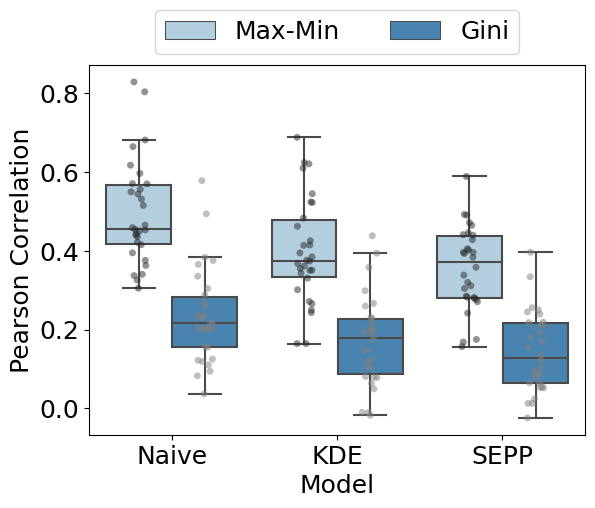

In [ ]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 18})


fig, ax = plt.subplots()
Pearson.replace("NAIVE","Naive",inplace=True)
Pearson.replace("Maxmin","Max-Min",inplace=True)
g=sns.boxplot(Pearson,x="Model",y="Pearson Correlation",hue="Fairness Measure",order=["Naive","KDE","SEPP"], showfliers=False,ax=ax,hue_order=["Max-Min","Gini"],palette="Blues")
g=sns.stripplot(Pearson,x="Model",y="Pearson Correlation",hue="Fairness Measure",order=["Naive","KDE","SEPP"],dodge=True,alpha=0.5,color="grey",legend=False,ax=ax,hue_order=["Max-Min","Gini"])



# sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.15),
#                 ncol=3)
# plt.ylim(-0.4,1.7)
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', borderaxespad=0,ncol=3)

plt.savefig('Pearson.svg',dpi=300,bbox_inches='tight')
plt.savefig('Pearson.png',dpi=300,bbox_inches='tight')
plt.savefig('Pearson.eps',dpi=300,bbox_inches='tight')

In [ ]:
Pearson.drop("ID",axis=1).groupby(["Fairness Measure","Model"]).describe().reset_index()

Fairness Measure  Model Pearson Correlation                                \
                                        count      mean       std       min   
0             Gini    KDE                30.0  0.169956  0.112927 -0.017328   
1             Gini  Naive                30.0  0.234676  0.120034  0.036918   
2             Gini   SEPP                30.0  0.143449  0.101223 -0.024183   
3          Max-Min    KDE                30.0  0.399556  0.132728  0.164512   
4          Max-Min  Naive                30.0  0.497145  0.131462  0.305066   
5          Max-Min   SEPP                30.0  0.356366  0.104383  0.156989   
6         Variance    KDE                30.0  0.413298  0.114621  0.217948   
7         Variance  Naive                30.0  0.517721  0.112953  0.379956   
8         Variance   SEPP                30.0  0.362215  0.105109  0.124239   

                                           
        25%       50%       75%       max  
0  0.086644  0.177918  0.225837  0.438257  
1  0.155690  0.216689  0.283376  0.578385  
2  0.064609  0.128467  0.216319  0.396387  
3  0.333844  0.375030  0.478034  0.688190  
4  0.417210  0.456701  0.566581  0.828940  
5  0.281348  0.370961  0.436878  0.588924  
6  0.339553  0.418747  0.493217  0.633095  
7  0.424141  0.491242  0.586843  0.807813  
8  0.290605  0.370110  0.452329  0.524756

In [ ]:
dfs=[]


for i in range(0,55,5):
    df=data_results.copy()
    df["Protected Group Disparity"]=(df["B_no_protected"]*(1+i/100) < df["B_protected"]).astype(int)
    df["Threshold Range"]=str(i)+"%"
    dfs.append(df)
    print(i)
dfs=pd.concat(dfs)

0
5
10
15
20
25
30
35
40
45
50


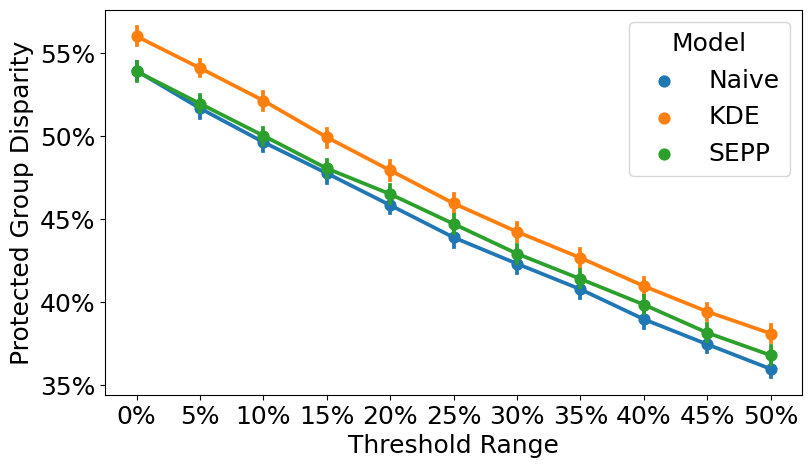

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
dfs.replace("NAIVE","Naive",inplace=True)
g=sns.pointplot(dfs,x="Threshold Range",y="Protected Group Disparity",hue="Model",estimator="mean",errorbar="ci",hue_order=["Naive","KDE","SEPP"],ax=ax)
g.axes.yaxis.set_major_formatter(PercentFormatter(1,decimals=0))

fig.savefig('Unbalanced_Predictions.svg',dpi=300,bbox_inches='tight')
fig.savefig('Unbalanced_Predictions.png',dpi=300,bbox_inches='tight')
fig.savefig('Unbalanced_Predictions.eps',dpi=300,bbox_inches='tight')

In [ ]:
dfs.sort_values("Model",ascending=False)

,Model,Data_id,Dia,tipo_fairness,Valor,EMD,B_protected,B_no_protected,B_total,Protected Group Disparity,Threshold Range
0,SEPP,0,2030-01-01,variance,9.908611e-07,0.014834,0.037452,0.036044,0.036607,1,0%
49514,SEPP,15,2030-05-05,gini,1.116575e-01,0.023292,0.064396,0.040885,0.050290,1,25%
49512,SEPP,15,2030-05-05,variance,2.763807e-04,0.023292,0.064396,0.040885,0.050290,1,25%
49511,SEPP,15,2030-05-04,gini,7.493286e-02,0.027748,0.051145,0.037813,0.043146,1,25%
49510,SEPP,15,2030-05-04,MaxMin,1.333178e-02,0.027748,0.051145,0.037813,0.043146,1,25%
...,...,...,...,...,...,...,...,...,...,...,...
67707,KDE,20,2030-01-02,variance,2.303720e-03,0.018105,0.068831,0.000953,0.028105,1,20%
67708,KDE,20,2030-01-02,MaxMin,6.787813e-02,0.018105,0.068831,0.000953,0.028105,1,20%
67709,KDE,20,2030-01-02,gini,4.863395e-01,0.018105,0.068831,0.000953,0.028105,1,20%
67710,KDE,20,2030-01-03,variance,4.611497e-03,0.033706,0.096983,0.000947,0.039362,1,20%


In [ ]:
dfs[["Model","Protected Group Disparity","Threshold Range"]].groupby(["Model","Threshold Range"]).agg({"mean","std"})

Protected Group Disparity          
                                            std      mean
Model Threshold Range                                    
KDE   0%                               0.496363  0.560256
      10%                              0.499544  0.521520
      15%                              0.500007  0.499451
      20%                              0.499587  0.479487
      25%                              0.498374  0.459615
      30%                              0.496689  0.442491
      35%                              0.494625  0.426832
      40%                              0.491804  0.409799
      45%                              0.488732  0.394414
      5%                               0.498314  0.541117
      50%                              0.485696  0.381227
Naive 0%                               0.498447  0.539469
      10%                              0.499996  0.496520
      15%                              0.499512  0.477747
      20%                              0.498284  0.458516
      25%                              0.496285  0.439103
      30%                              0.494083  0.423260
      35%                              0.491447  0.407875
      40%                              0.487720  0.389835
      45%                              0.484059  0.374725
      5%                               0.499724  0.516850
      50%                              0.479975  0.359890
SEPP  0%                               0.498476  0.539103
      10%                              0.500007  0.500366
      15%                              0.499634  0.480678
      20%                              0.498795  0.465201
      25%                              0.497218  0.447253
      30%                              0.494984  0.429304
      35%                              0.492574  0.414103
      40%                              0.489623  0.398626
      45%                              0.485807  0.381685
      5%                               0.499620  0.519689
      50%                              0.482305  0.368132